In [1]:
# MovieLens helps you find movies you will like. Rate movies to build a custom taste profile,
# then MovieLens recommends other movies for you to watch.

# Below is a collection of data collected from MovieLens users in the late 1990s and early 2000s. 
# The data provides movie ratings, movie metadata (genres and year), and demographic data about the users
# (age, zip code, gender identification, and occupation).

### Objectives

1. Is there a distinct difference in rating distribution between genders?
2. What are the most common genres that both genders enjoy?
3. What movies were received well by both genders?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
demographic_headers = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table(r'C:\Users\hh4678\Desktop\DS ML\movielens\users.dat', sep='::', 
                      header=None, engine='python', names=demographic_headers)

rating_headers = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table(r'C:\Users\hh4678\Desktop\DS ML\movielens\ratings.dat', sep='::',
                       header=None, engine='python', names=rating_headers)

movie_headers = ['movie_id', 'title', 'genres']
movies = pd.read_table(r'C:\Users\hh4678\Desktop\DS ML\movielens\movies.dat', sep='::',
                      header=None, engine='python', names=movie_headers)

In [4]:
# Let's see what the data looks like

movies[:3]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [5]:
# Merge automatically determines which columns to use as the join based on overlapping names

data = pd.merge(pd.merge(ratings, users), movies)
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [6]:
# What is the distribution between genders in our data?

results = {}
for g in ['M', 'F']:
    results[g] = (data.loc[data['gender'] == g].shape[0], 
                  '{:.2%}'.format(data.loc[data['gender'] == g].shape[0] / len(data)))
    
print('Gender: # of samples, overall percentage\n\n{}'.format(results))

Gender: # of samples, overall percentage

{'M': (753769, '75.36%'), 'F': (246440, '24.64%')}


#### There is almost 3x more data for Males. 
#### However this isn't necessarily bad since our sample set for women is still large enough

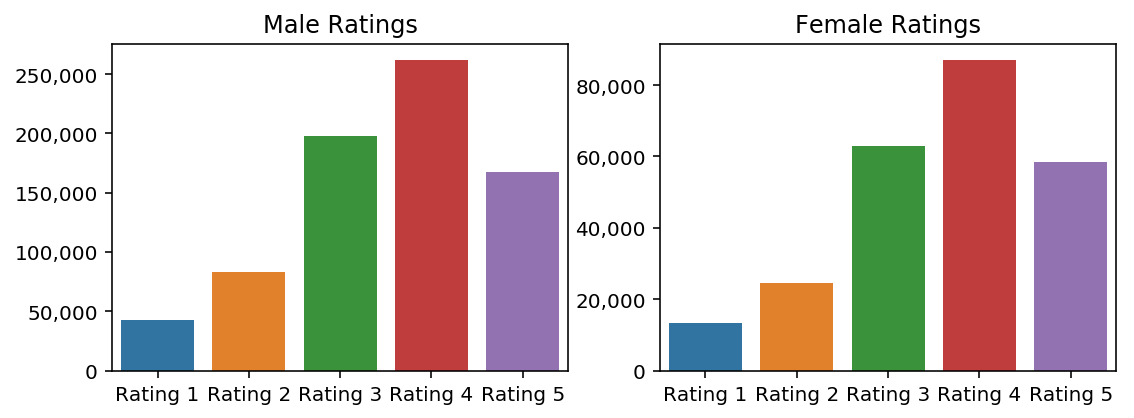

In [7]:
# Let's see what the distribution is for ratings

m_ratings = pd.DataFrame({'rating' : data['rating'].loc[data['gender'] == 'M']})
f_ratings = pd.DataFrame({'rating' : data['rating'].loc[data['gender'] == 'F']})

mr = m_ratings['rating'].value_counts()
fr = f_ratings['rating'].value_counts()
mr.sort_index(inplace=True)
fr.sort_index(inplace=True)

# Subplots

fig, ax = plt.subplots(1, 2, figsize=(9, 3), sharey=False)

m = sns.barplot(x=['Rating 1', 'Rating 2', 'Rating 3', 'Rating 4', 'Rating 5'], y=mr.values, data=mr, 
                ax=ax[0]).set_title('Male Ratings')
f = sns.barplot(x=['Rating 1', 'Rating 2', 'Rating 3', 'Rating 4', 'Rating 5'], y=fr.values, data=fr, 
                ax=ax[1]).set_title('Female Ratings')

for i in range(2):
    ax[i].set_yticklabels(['{:,}'.format(int(x)) for x in ax[i].get_yticks().tolist()])


plt.show()

#### Overall, both Males and Females rarely give out 1s or 2s.

In [8]:
# Let's see what the average movie rating for each film is (with count of ratings included)

mean_ratings = data.pivot_table(values='rating', index='title', columns='gender', aggfunc=['mean', len])
# mean_ratings = data.pivot_table(values='rating', index='title', columns='gender', aggfunc=['mean'])
mean_ratings[:10]

mean              len       
gender                                    F         M      F      M
title                                                              
$1,000,000 Duck (1971)             3.375000  2.761905   16.0   21.0
'Night Mother (1986)               3.388889  3.352941   36.0   34.0
'Til There Was You (1997)          2.675676  2.733333   37.0   15.0
'burbs, The (1989)                 2.793478  2.962085   92.0  211.0
...And Justice for All (1979)      3.828571  3.689024   35.0  164.0
1-900 (1994)                       2.000000  3.000000    1.0    1.0
10 Things I Hate About You (1999)  3.646552  3.311966  232.0  468.0
101 Dalmatians (1961)              3.791444  3.500000  187.0  378.0
101 Dalmatians (1996)              3.240000  2.911215  150.0  214.0
12 Angry Men (1957)                4.184397  4.328421  141.0  475.0

#### Some movies have such few ratings that we may choose to ignore them.

In [9]:
# Let's filter movies that have at least 250 ratings.

ratings_by_title = data.groupby('title').size()
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [10]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [11]:
mean_ratings = mean_ratings.loc[active_titles]

mean_ratings[:10]

mean              len        
gender                                      F         M      F       M
title                                                                 
'burbs, The (1989)                   2.793478  2.962085   92.0   211.0
10 Things I Hate About You (1999)    3.646552  3.311966  232.0   468.0
101 Dalmatians (1961)                3.791444  3.500000  187.0   378.0
101 Dalmatians (1996)                3.240000  2.911215  150.0   214.0
12 Angry Men (1957)                  4.184397  4.328421  141.0   475.0
13th Warrior, The (1999)             3.112000  3.168000  125.0   625.0
2 Days in the Valley (1996)          3.488889  3.244813   45.0   241.0
20,000 Leagues Under the Sea (1954)  3.670103  3.709205   97.0   478.0
2001: A Space Odyssey (1968)         3.825581  4.129738  344.0  1372.0
2010 (1984)                          3.446809  3.413712   47.0   423.0

In [12]:
# What are the top 5 Female ratings?

top_female_ratings = mean_ratings.sort_values(by=('mean', 'F'), ascending=False)
top_female_ratings[:5]

mean              len  \
gender                                                     F         M      F   
title                                                                           
Close Shave, A (1995)                               4.644444  4.473795  180.0   
Wrong Trousers, The (1993)                          4.588235  4.478261  238.0   
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)       4.572650  4.464589  117.0   
Wallace & Gromit: The Best of Aardman Animation...  4.563107  4.385075  103.0   
Schindler's List (1993)                             4.562602  4.491415  615.0   

                                                            
gender                                                   M  
title                                                       
Close Shave, A (1995)                                477.0  
Wrong Trousers, The (1993)                           644.0  
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)        353.0  
Wallace & Gromit: The Best of Aardman Animation...   335.0  
Schindler's List (1993)                             1689.0

In [13]:
# What are the top 5 Male ratings?

top_male_ratings = mean_ratings.sort_values(by=('mean', 'M'), ascending=False)
top_male_ratings[:5]

mean              len  \
gender                                                     F         M      F   
title                                                                           
Godfather, The (1972)                               4.314700  4.583333  483.0   
Seven Samurai (The Magnificent Seven) (Shichini...  4.481132  4.576628  106.0   
Shawshank Redemption, The (1994)                    4.539075  4.560625  627.0   
Raiders of the Lost Ark (1981)                      4.332168  4.520597  572.0   
Usual Suspects, The (1995)                          4.513317  4.518248  413.0   

                                                            
gender                                                   M  
title                                                       
Godfather, The (1972)                               1740.0  
Seven Samurai (The Magnificent Seven) (Shichini...   522.0  
Shawshank Redemption, The (1994)                    1600.0  
Raiders of the Lost Ark (1981)                      1942.0  
Usual Suspects, The (1995)                          1370.0

### Measuring Rating Disagreement

In [14]:
mean_ratings['diff'] = mean_ratings['mean', 'M'] - mean_ratings['mean', 'F']

mean_ratings.sort_values(by=('diff'), ascending=False)[:5]


mean              len         \
gender                                         F         M      F      M   
title                                                                      
Good, The Bad and The Ugly, The (1966)  3.494949  4.221300   99.0  723.0   
Kentucky Fried Movie, The (1977)        2.878788  3.555147   33.0  272.0   
Dumb & Dumber (1994)                    2.697987  3.336595  149.0  511.0   
Longest Day, The (1962)                 3.411765  4.031447   34.0  318.0   
Cable Guy, The (1996)                   2.250000  2.863787   84.0  301.0   

                                            diff  
gender                                            
title                                             
Good, The Bad and The Ugly, The (1966)  0.726351  
Kentucky Fried Movie, The (1977)        0.676359  
Dumb & Dumber (1994)                    0.638608  
Longest Day, The (1962)                 0.619682  
Cable Guy, The (1996)                   0.613787

In [15]:
rating_std_by_title = data.groupby('title')['rating'].std()

# Filter down to active titles
rating_std_by_title = rating_std_by_title.loc[active_titles]

# Order Series by value in descending order
rating_std_by_title.sort_values(ascending=True)[:10]

title
Close Shave, A (1995)                            0.667143
Rear Window (1954)                               0.688946
Great Escape, The (1963)                         0.692585
Shawshank Redemption, The (1994)                 0.700443
Wrong Trousers, The (1993)                       0.708666
Raiders of the Lost Ark (1981)                   0.725647
North by Northwest (1959)                        0.732515
Hustler, The (1961)                              0.737298
Double Indemnity (1944)                          0.740793
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)    0.740924
Name: rating, dtype: float64